In [59]:
#RM 558062 NOME: HENRIQUE FRANCISCO GARCIA

#Aqui foi feito a importação das tabelas que serão usadas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Realizado a leitura do arquivo que contém so dados do dataset
#O dataset escolhido foi Heart Attack Analysis & Prediction Dataset
#Há nesse dataset dados de pessoas e exames efetuados para verificar sua saúde cardiovascular
#Assim o que vamos fazer é: Prever se o paciente é cardíaco ou não.
import kagglehub
df = pd.read_csv(r"heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
#Podemos ver aqui que o dataset tem 14 colunas e 303 linhas.
df.shape

(303, 14)

In [62]:
#Aqui está o tipo de cada dado do dataset..
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [63]:
#Pegamos chol que é o Colesterol para verificar algumas coisas.
df["chol"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0


In [64]:
#E também a idade para termos dois parametros.
#Assim conseguimos ver
df["age"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0


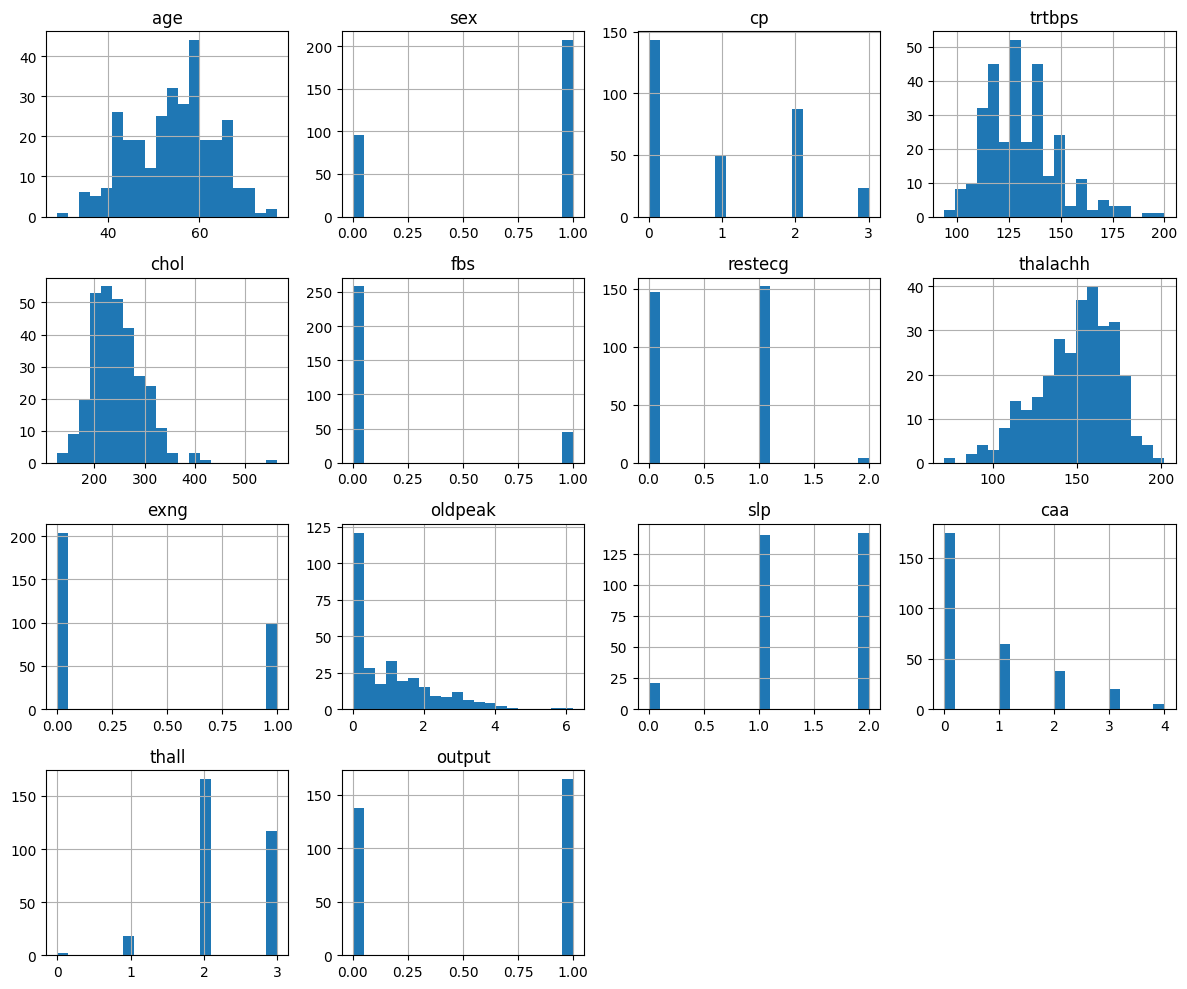

In [65]:

df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

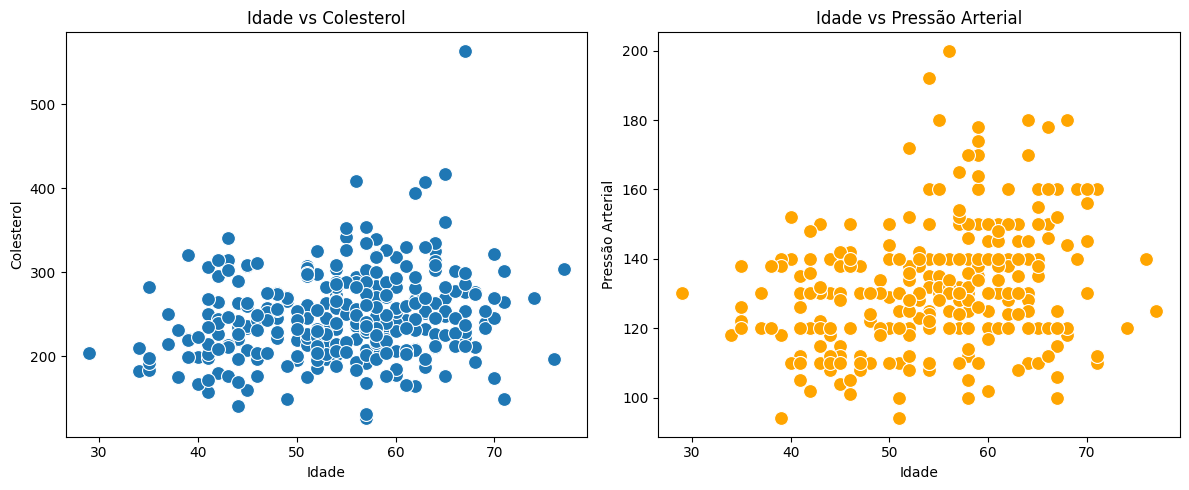

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='chol', s=100)
plt.title('Idade vs Colesterol')
plt.xlabel('Idade')
plt.ylabel('Colesterol')

# Gráfico de Dispersão para Pressão Arterial
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='trtbps', s=100, color='orange')
plt.title('Idade vs Pressão Arterial')
plt.xlabel('Idade')
plt.ylabel('Pressão Arterial')

plt.tight_layout()
plt.show()

#Podemos ver que a uma presença maior de Colesterol e Pressão Arterial alta em pacientes com idade de 50 a 60 anos.
# Já podemos indicar que essas pessoas pendem tem maiores complicações.

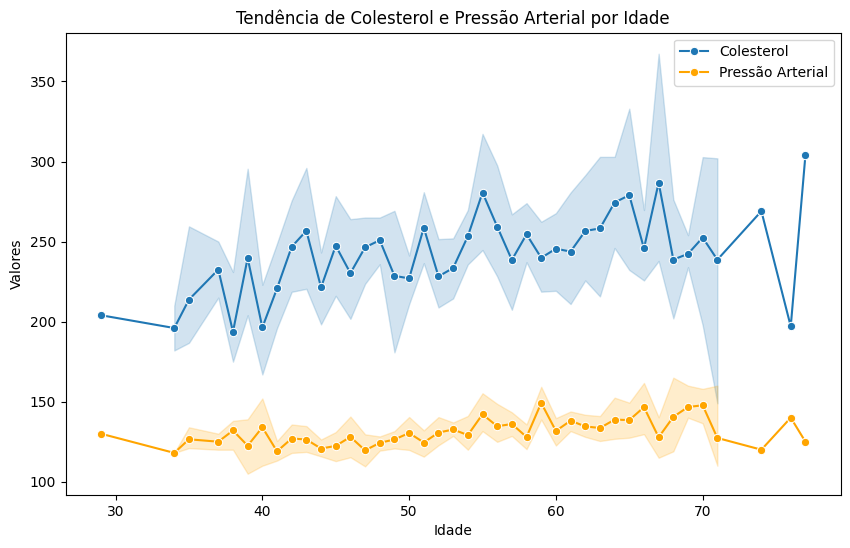

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='chol', marker='o', label='Colesterol')
sns.lineplot(data=df, x='age', y='trtbps', marker='o', label='Pressão Arterial', color='orange')
plt.title('Tendência de Colesterol e Pressão Arterial por Idade')
plt.xlabel('Idade')
plt.ylabel('Valores')
plt.legend()
plt.show()

#Neste gráfico fica claro a relação entre os colesterol e pressão arterial, usando a idade nos dois.
#Vemos que os picos de colesterol também seguem os picos da pressão arterial.

In [68]:
#Nesse trecho vamos fazer a divisão de teste e treino, usando o output como um padrão
#Output diz que 1 é igual a paciente cardiaco e 0 para paciente sem problema cardiovasculares.
from sklearn.model_selection import train_test_split

X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#Realizando a normalização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
#Após a normalização vamos treinar os dados com o código abaixo.
#Ele que ira "Ensinar" os dados para a IA.
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<Axes: >

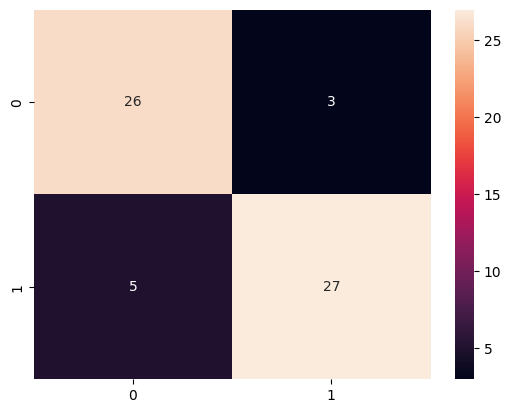

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svc_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#Aqui temos o resultado do ensimento feito a máquina
#Vemos:
#0-0 (verdadeiro positivo - tp)
#1-1 (verdadeiro negativo - tn)
#1-0 (falso positivo - fn)
#0-1 (falso negativo - fp)

#podemos ver que nosso modelo tem maior precisão com a classe 1
#vemos que esse modelo tem 87% de acurácia

In [72]:
# Salvando o modelo para não precisa retreinar.

import joblib

# Salvar o modelo
joblib.dump(svc_model, 'heart_model.pkl')
# Salvar o scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [73]:
import joblib
import numpy as np

# Carregar o modelo e o scaler salvos
model = joblib.load('heart_model.pkl')
scaler = joblib.load('scaler.pkl')

# Novo dado para predição (substitua pelos valores reais)
# As características devem estar na mesma ordem que no conjunto de treinamento
# Exemplo: [Idade, Sexo, Tipo de dor no peito, Pressão em Repouso, Colesterol, Glicose em Jejum, Eletrocardiograma, Máximo na Frequencia cardiaca]
# [Angina induzida, Depressão do Segmento, Inclinação, número de vasos sanguineos, resultado da talassemia, variavel alvo]

new_data = np.array([[25, 0, 0, 112, 112, 0, 0, 108, 0, 0, 150, 0, 3]])

# Escalar o novo dado usando o scaler carregado
new_data_scaled = scaler.transform(new_data)

# Fazer a predição com o modelo carregado
prediction = model.predict(new_data_scaled)

# Interpretar o resultado
if prediction[0] == 1:
    print("O modelo prevê que o paciente TEM riscos de saude cardiovascular.")
else:
    print("O modelo prevê que o paciente NÃO TEM riscos de saude cardiovascular.")


O modelo prevê que o paciente TEM riscos de saude cardiovascular.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
